# **Sales Forecasting**

## Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import statsmodels.api as sm

import pickle 
import os
from os import path
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Data Preprocessing and Cleaning

## Reading all datasets for a basic understanding

In [3]:
data = pd.read_csv(r"C:\Users\MIMMIM\Desktop\ML\Practice GUVI Capstone\Practice Project 5 (Final Project)\Sales Forecasting\train.csv")
stores = pd.read_csv(r"C:\Users\MIMMIM\Desktop\ML\Practice GUVI Capstone\Practice Project 5 (Final Project)\Sales Forecasting\stores.csv")
features = pd.read_csv(r"C:\Users\MIMMIM\Desktop\ML\Practice GUVI Capstone\Practice Project 5 (Final Project)\Sales Forecasting\features.csv")

#### Train Dataset

In [4]:
# Display the basic information of train
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None


In [5]:
# Display the first few rows of the dataset
print(data.head())

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False


In [6]:
# Display summary statistics of numerical columns
print(data.describe())

               Store           Dept   Weekly_Sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.360000


In [7]:
print(data.shape)

(421570, 5)


In [8]:
print(data.tail())

        Store  Dept        Date  Weekly_Sales  IsHoliday
421565     45    98  2012-09-28        508.37      False
421566     45    98  2012-10-05        628.10      False
421567     45    98  2012-10-12       1061.02      False
421568     45    98  2012-10-19        760.01      False
421569     45    98  2012-10-26       1076.80      False


#### Stores Dataset

In [9]:
# Display the basic information of stores
print(stores.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [10]:
# Display the first few rows of the dataset
print(stores.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [11]:
# Display summary statistics of numerical columns
print(stores.describe())

           Store           Size
count  45.000000      45.000000
mean   23.000000  130287.600000
std    13.133926   63825.271991
min     1.000000   34875.000000
25%    12.000000   70713.000000
50%    23.000000  126512.000000
75%    34.000000  202307.000000
max    45.000000  219622.000000


In [12]:
print(stores.shape)

(45, 3)


In [13]:
print(stores.tail())

    Store Type    Size
40     41    A  196321
41     42    C   39690
42     43    C   41062
43     44    C   39910
44     45    B  118221


### Features Dataset

In [14]:
# Display the basic information of features
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [15]:
# Display the first few rows of the dataset
print(features.head())

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


In [16]:
# Display summary statistics of numerical columns
print(features.describe())

             Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462208   6792.329861   13086.690278    39.7383

In [17]:
print(features.shape)

(8190, 12)


In [18]:
print(features.tail())

      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5  CPI  Unemployment  IsHoliday  
8185       3.00    2449.97    3169.69  NaN           NaN      False  
8186     582.74    5797.47    1514.93  NaN           NaN      False  
8187      85.72     744.84    2150.36  NaN           NaN      False  
8188     204.19     363.00    1059.46  NaN           NaN      False  
8189       2.06      10.88    1864.57  NaN           NaN      False  


## Handling Missing Values

In [19]:
features["CPI"].fillna(features["CPI"].median(),inplace=True)
features["Unemployment"].fillna(features["Unemployment"].median(),inplace=True)

In [20]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [21]:
print(features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     8190 non-null   float64
 5   MarkDown2     8190 non-null   float64
 6   MarkDown3     8190 non-null   float64
 7   MarkDown4     8190 non-null   float64
 8   MarkDown5     8190 non-null   float64
 9   CPI           8190 non-null   float64
 10  Unemployment  8190 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None


In [27]:
# Check for missing values
print(features.isnull().sum())

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


## Merging the datasets

In [23]:
data = pd.merge(data,stores,on='Store',how='left')

In [24]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [25]:
data['Date'] = pd.to_datetime(data['Date'])

In [26]:
data.sort_values(by=['Date'],inplace=True)

In [27]:
data.set_index(data.Date, inplace=True)

In [28]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

True

In [29]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   Type          421570 non-null  object        
 5   Size          421570 non-null  int64         
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  I

In [30]:
# Check for missing values
print(data.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
Type            0
Size            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64


In [31]:
print(data.head())

            Store  Dept       Date  Weekly_Sales Type    Size  Temperature  \
Date                                                                         
2010-02-05      1     1 2010-02-05      24924.50    A  151315        42.31   
2010-02-05     29     5 2010-02-05      15552.08    B   93638        24.36   
2010-02-05     29     6 2010-02-05       3200.22    B   93638        24.36   
2010-02-05     29     7 2010-02-05      10820.05    B   93638        24.36   
2010-02-05     29     8 2010-02-05      20055.64    B   93638        24.36   

            Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Date                                                                            
2010-02-05       2.572        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0    

## Convert Date Column to Datetime Format

In [32]:
data['Year'] = data['Date'].dt.year.astype('int')
data['Month'] = data['Date'].dt.month.astype('int')
data['Week'] = data['Date'].dt.isocalendar().week.astype('int')

In [33]:
print(data.head())

            Store  Dept       Date  Weekly_Sales Type    Size  Temperature  \
Date                                                                         
2010-02-05      1     1 2010-02-05      24924.50    A  151315        42.31   
2010-02-05     29     5 2010-02-05      15552.08    B   93638        24.36   
2010-02-05     29     6 2010-02-05       3200.22    B   93638        24.36   
2010-02-05     29     7 2010-02-05      10820.05    B   93638        24.36   
2010-02-05     29     8 2010-02-05      20055.64    B   93638        24.36   

            Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
Date                                                                            
2010-02-05       2.572        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0        0.0        0.0        0.0   
2010-02-05       2.788        0.0        0.0    

# Exploratory Data Analysis (EDA)

## Displaying basic statistics of the features

In [35]:
# Summary statistics of numerical features
print(data.describe())

               Store           Dept                           Date  \
count  421570.000000  421570.000000                         421570   
mean       22.200546      44.260317  2011-06-18 08:30:31.963375360   
min         1.000000       1.000000            2010-02-05 00:00:00   
25%        11.000000      18.000000            2010-10-08 00:00:00   
50%        22.000000      37.000000            2011-06-17 00:00:00   
75%        33.000000      74.000000            2012-02-24 00:00:00   
max        45.000000      99.000000            2012-10-26 00:00:00   
std        12.785297      30.492054                            NaN   

        Weekly_Sales           Size    Temperature     Fuel_Price  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean    15981.258123  136727.915739      60.090059       3.361027   
min     -4988.940000   34875.000000      -2.060000       2.472000   
25%      2079.650000   93638.000000      46.680000       2.933000   
50%      7612.030000  14

## Identify any outliers or anomalies in the data

In [36]:
agg_data = data.groupby(['Store', 'Dept']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store      0
Dept       0
max        0
min        0
mean       0
median     0
std       37
dtype: int64

In [37]:
store_data = pd.merge(left=data,right=agg_data,on=['Store', 'Dept'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [38]:
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.0,0.0,...,8.106,False,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,0.0,0.0,...,6.299,False,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,0.0,0.0,...,6.415,False,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095


In [39]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [40]:
numeric_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown']
data_numeric = data[numeric_col].copy()

In [31]:
data.shape

(421533, 20)

### Z-Score Method

In [41]:
data = data[(np.abs(stats.zscore(data_numeric)) < 2.5).all(axis = 1)]
print(data.shape)

(375438, 20)


In [42]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 375438 entries, 2010-02-05 to 2012-10-26
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Store           375438 non-null  int64         
 1   Dept            375438 non-null  int64         
 2   Date            375438 non-null  datetime64[ns]
 3   Weekly_Sales    375438 non-null  float64       
 4   Type            375438 non-null  object        
 5   Size            375438 non-null  int64         
 6   Temperature     375438 non-null  float64       
 7   Fuel_Price      375438 non-null  float64       
 8   CPI             375438 non-null  float64       
 9   Unemployment    375438 non-null  float64       
 10  IsHoliday       375438 non-null  bool          
 11  Year            375438 non-null  int32         
 12  Month           375438 non-null  int32         
 13  Week            375438 non-null  int32         
 14  max             3754

In [43]:
print(data.isnull().sum())

Store             0
Dept              0
Date              0
Weekly_Sales      0
Type              0
Size              0
Temperature       0
Fuel_Price        0
CPI               0
Unemployment      0
IsHoliday         0
Year              0
Month             0
Week              0
max               0
min               0
mean              0
median            0
std               0
Total_MarkDown    0
dtype: int64


## Histogram of Weekly Sales

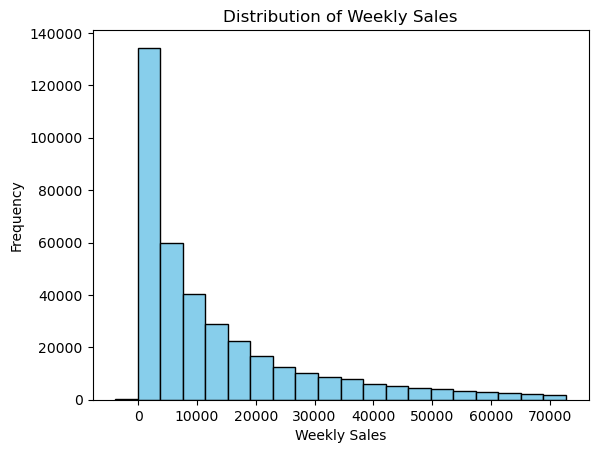

In [45]:
plt.hist(data['Weekly_Sales'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Weekly Sales')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

## Boxplot of Weekly Sales by Store Type

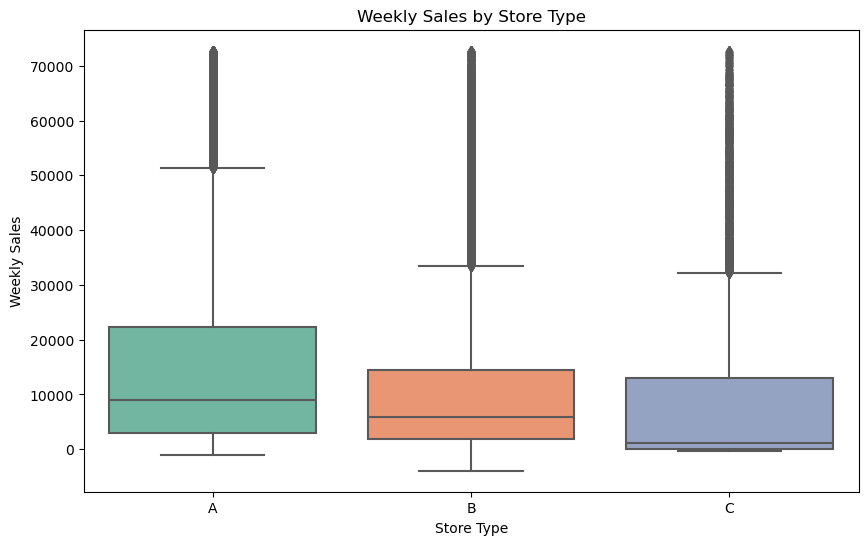

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Weekly_Sales', data=data, palette='Set2')
plt.title('Weekly Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Weekly Sales')
plt.show()

## Negative Weekly Sales

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


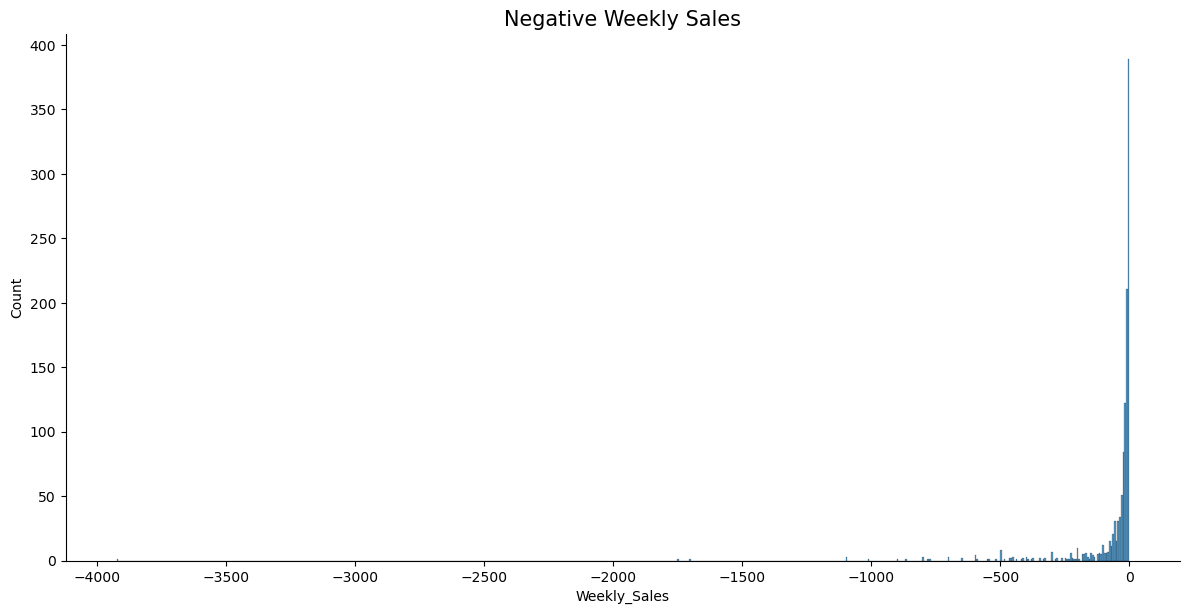

In [48]:
y = data["Weekly_Sales"][data.Weekly_Sales < 0]
sns.displot(y,height=6,aspect=2)
plt.title("Negative Weekly Sales", fontsize=15)
plt.show()

## Line Plot of Weekly Sales Over Time

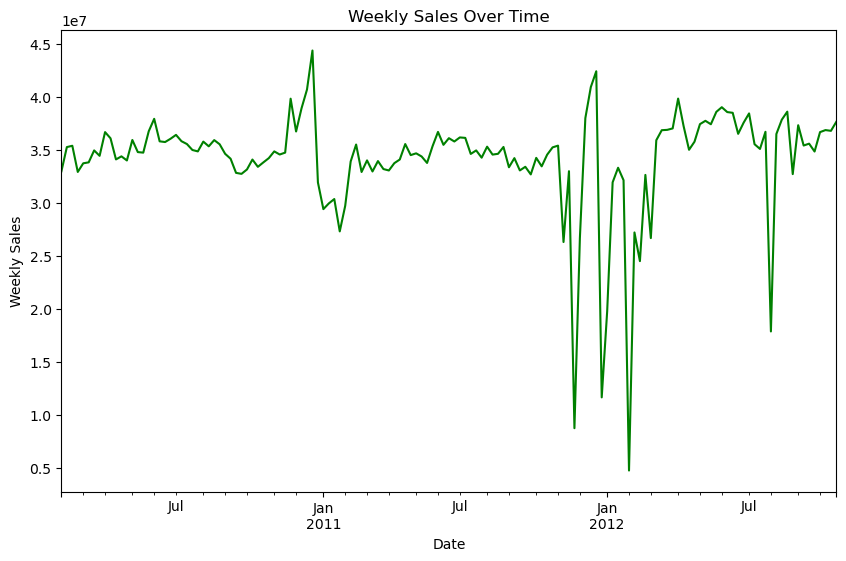

In [52]:
plt.figure(figsize=(10, 6))
data.groupby(data.index)['Weekly_Sales'].sum().plot(color='green')
plt.title('Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.show()

## Scatter Plot of Weekly Sales vs. Temperature

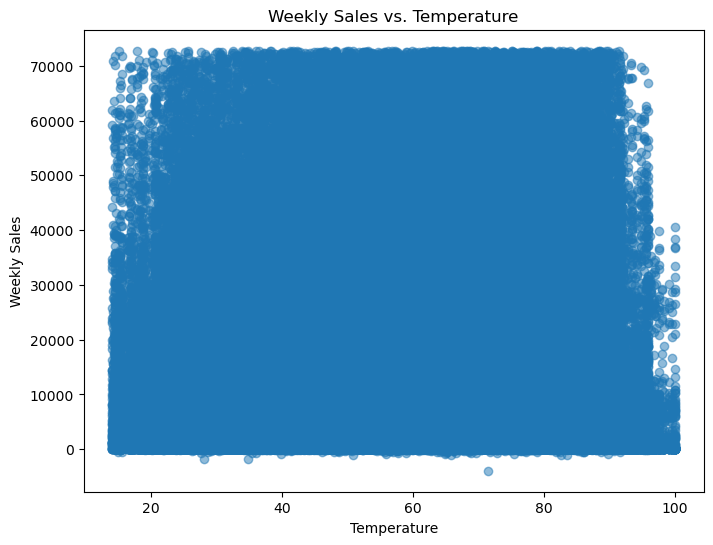

In [50]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Temperature'], data['Weekly_Sales'], alpha=0.5)
plt.title('Weekly Sales vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()

In [53]:
data=data[data['Weekly_Sales']>=0]

In [54]:
data.shape

(374247, 20)

In [ ]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

In [56]:
data.head()

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,max,min,mean,median,std,Total_MarkDown
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,57592.12,14537.37,22513.322937,18535.48,9854.349032,0.0
2010-02-05,9,97,2010-02-05,668.48,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,766.93,-9.92,372.655556,371.05,290.954675,0.0
2010-02-05,9,85,2010-02-05,693.87,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,2512.14,110.56,876.629441,824.04,307.436056,0.0
2010-02-05,8,80,2010-02-05,8654.60,A,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,11990.43,7414.43,9188.915105,9161.97,756.223236,0.0
2010-02-05,9,55,2010-02-05,11123.56,B,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,29166.26,4791.74,8607.050490,7571.60,3874.176095,0.0


In [40]:
import os

# Create the directory if it doesn't exist
directory = './datasets'
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file in the datasets directory
data.to_csv(os.path.join(directory, 'preprocessed_walmart_dataset.csv'))

## Average Monthly Sales

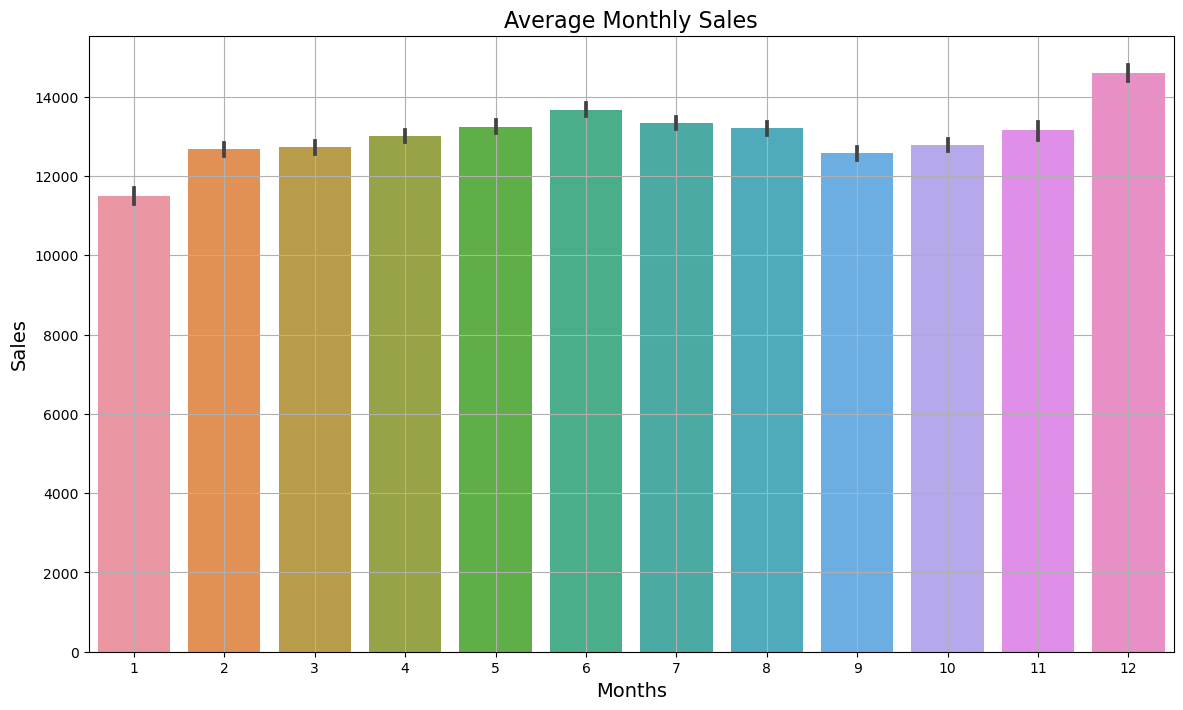

In [57]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

## Monthly Sales for Each Year

In [42]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,NaN,1.365986e+08,1.369976e+08,1.753251e+08,1.422677e+08,1.455770e+08,1.776954e+08,1.426176e+08,1.344151e+08,1.687452e+08,1.440445e+08,1.927286e+08
2011,1.170809e+08,1.320987e+08,1.341586e+08,1.710181e+08,1.382097e+08,1.441182e+08,1.762046e+08,1.398143e+08,1.668033e+08,1.375280e+08,1.034907e+08,1.597524e+08
2012,1.172222e+08,8.915290e+07,1.734250e+08,1.479222e+08,1.512280e+08,1.902330e+08,1.458221e+08,1.636039e+08,1.432228e+08,1.480537e+08,NaN,NaN


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

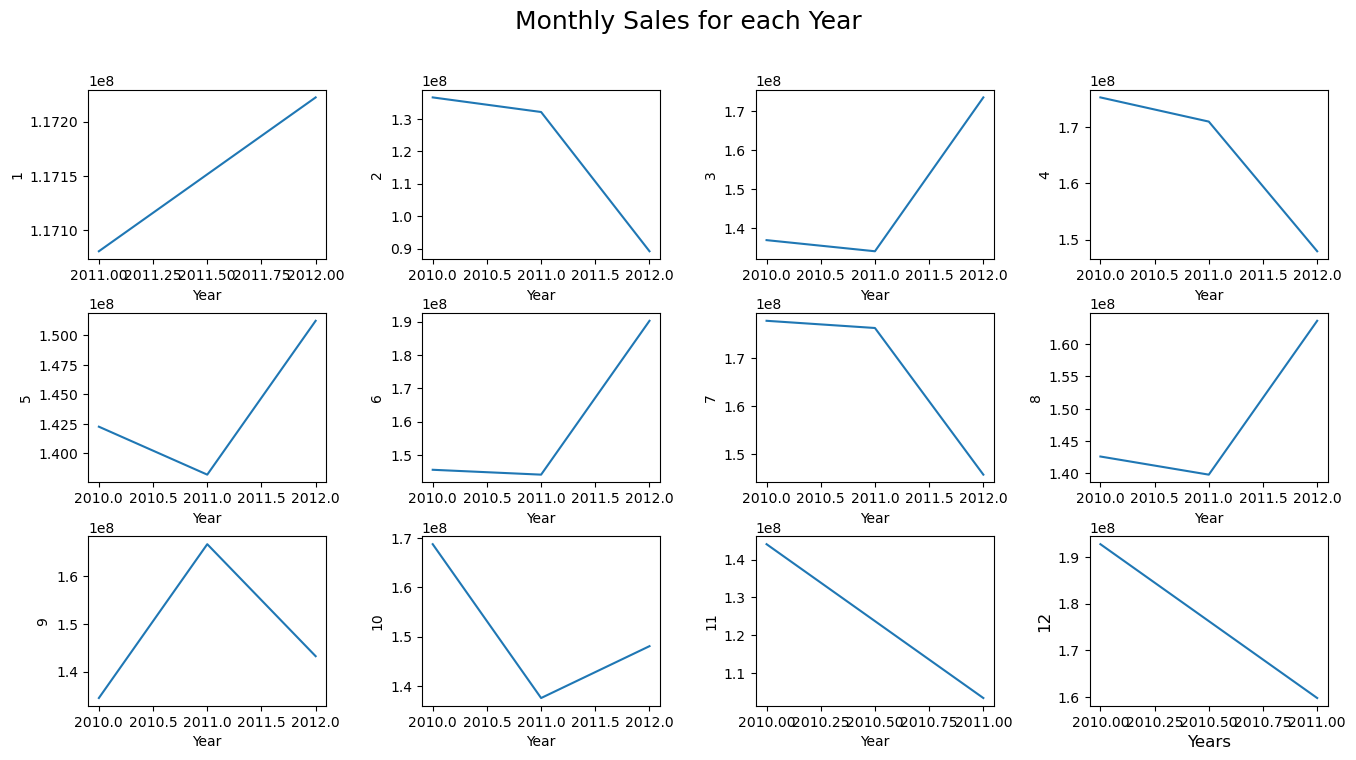

In [43]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

## Average Weekly Sales Store Wise

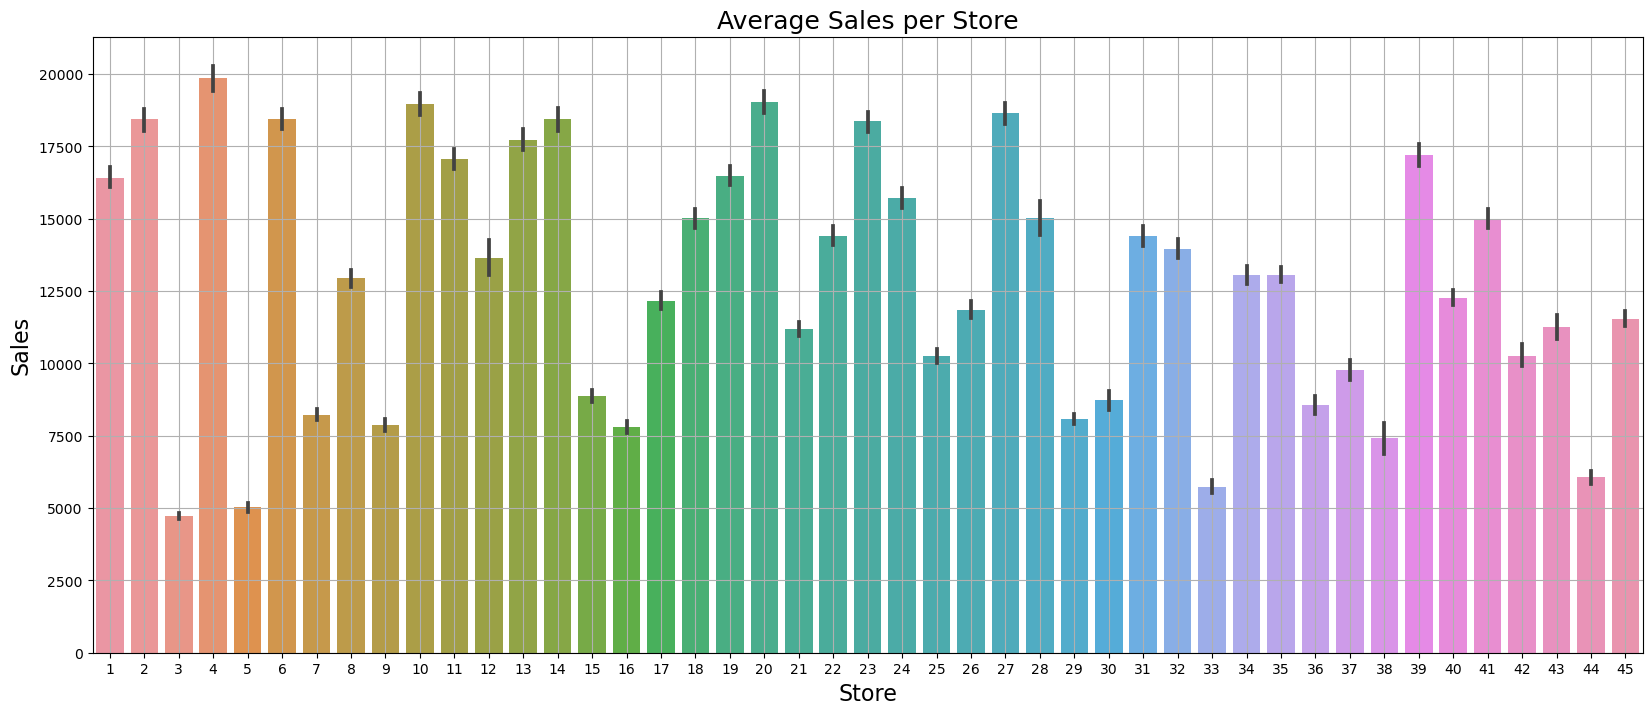

In [44]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

## Average Weekly Sales Store Wise

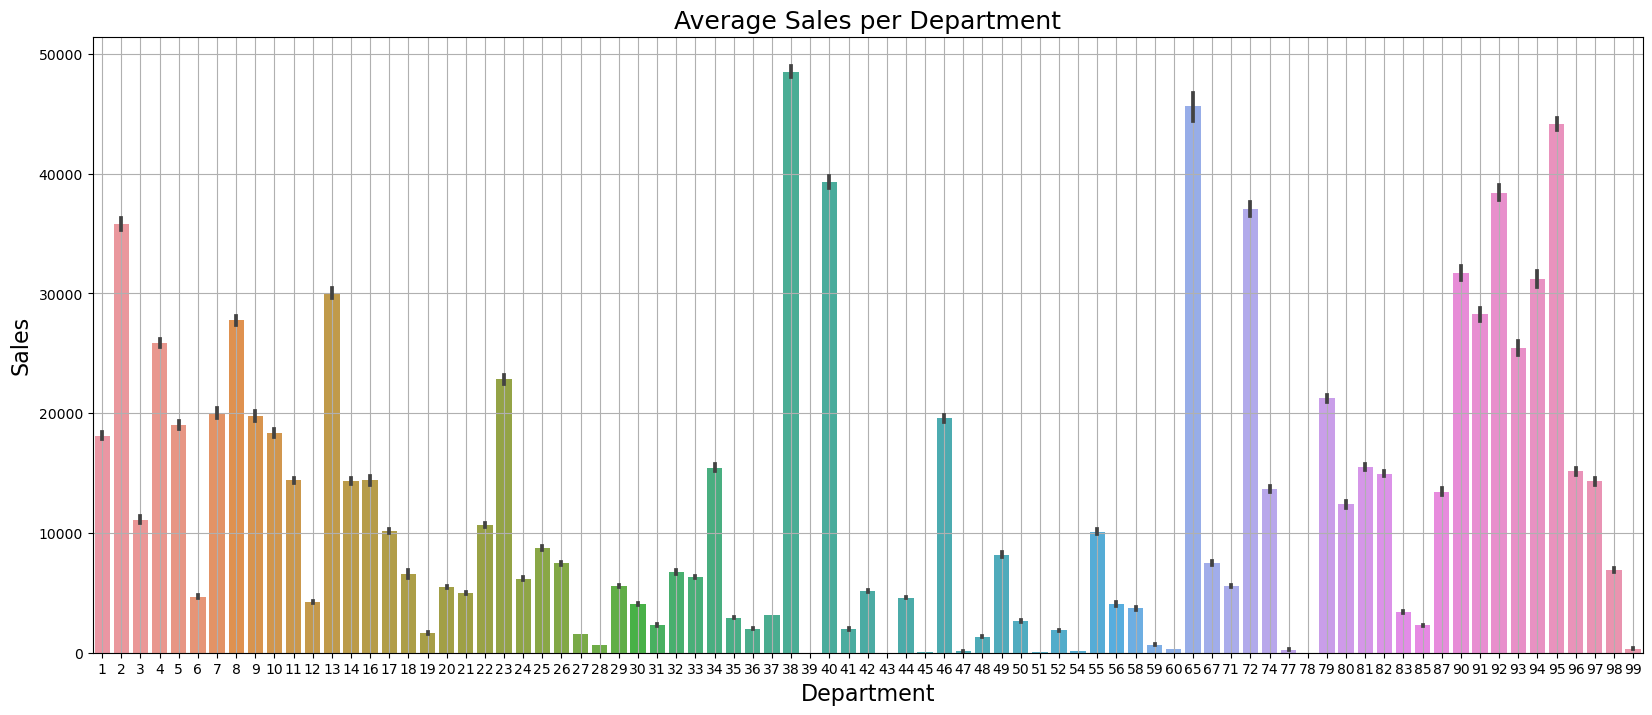

In [45]:
plt.figure(figsize=(20,8))
sns.barplot(x='Dept',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Department', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Department', fontsize=16)
plt.show()

## Sales Vs Temperature

C:\Users\MIMMIM\AppData\Local\Temp\ipykernel_13724\1231431672.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Temperature'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


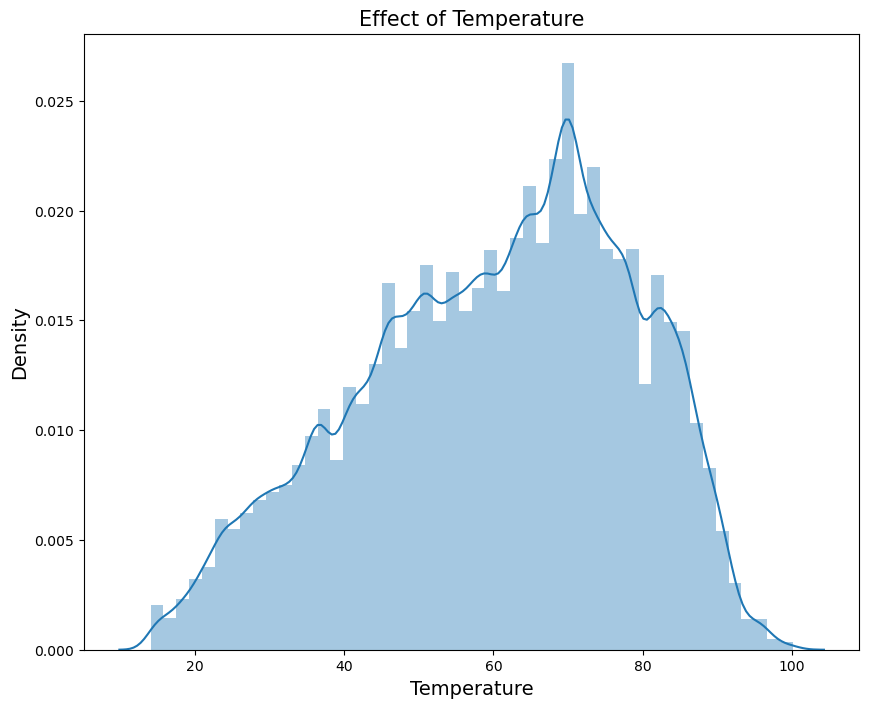

In [46]:
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

## Holiday Distribution

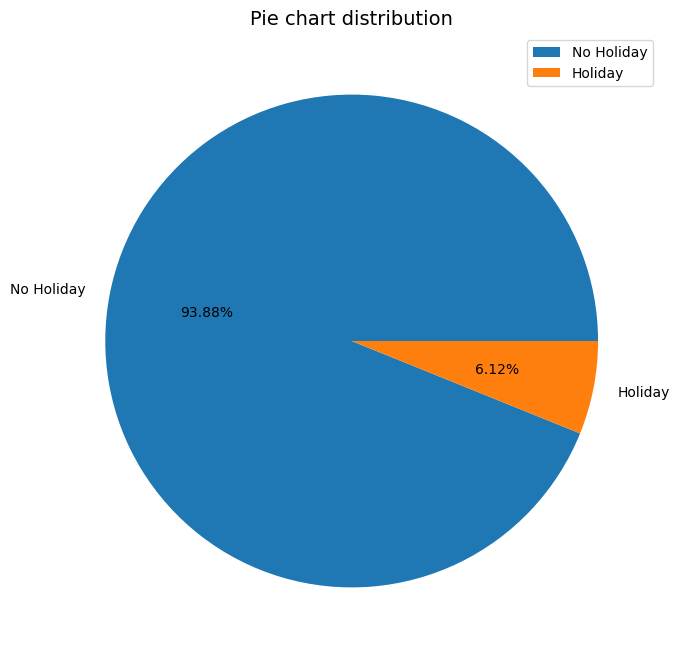

In [47]:
plt.figure(figsize=(8,8))
plt.pie(data['IsHoliday'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

## Time Series Decompose

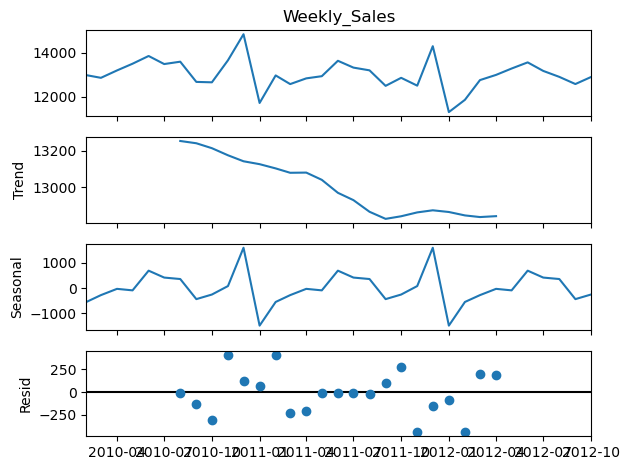

In [48]:
sm.tsa.seasonal_decompose(data['Weekly_Sales'].resample('MS').mean(), model='additive').plot()
plt.show()

## One-Hot-Encoding

In [49]:
cat_col = ['Store','Dept','Type']
data_cat = data[cat_col].copy()

In [50]:
data_cat.tail()

,Store,Dept,Type
Date,,,
2012-10-26,2,26,A
2012-10-26,38,23,C
2012-10-26,27,6,A
2012-10-26,36,40,A
2012-10-26,45,98,B


In [51]:
data_cat = pd.get_dummies(data_cat,columns=cat_col)

In [52]:
data_cat.head()

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [53]:
data.shape

(374247, 20)

In [54]:
data = pd.concat([data, data_cat],axis=1)

In [55]:
data.shape

(374247, 149)

In [56]:
data.drop(columns=cat_col,inplace=True)

In [57]:
data.drop(columns=['Date'],inplace=True)

In [58]:
data.shape

(374247, 145)

## Data Normalization

In [59]:
num_col = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment','Total_MarkDown','max','min','mean','median','std']

In [60]:
minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [61]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,24924.50,151315,42.31,2.572,211.096358,8.106,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,668.48,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,693.87,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,8654.60,155078,34.14,2.572,214.471451,6.299,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,11123.56,125833,38.01,2.572,214.655459,6.415,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


In [62]:
data = normalization(data.copy(),num_col)

In [63]:
data.head()

,Weekly_Sales,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,...,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.342576,0.630267,0.328495,0.0501,0.840500,0.508787,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.009188,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,True,False,False,False,True,False
2010-02-05,0.009537,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False
2010-02-05,0.118953,0.650636,0.233627,0.0501,0.873861,0.291286,0,2010,2,5,...,False,False,False,False,False,False,False,True,False,False
2010-02-05,0.152888,0.492338,0.278565,0.0501,0.875680,0.305248,0,2010,2,5,...,False,False,False,False,False,False,False,False,True,False


## Correlation between Features of dataset

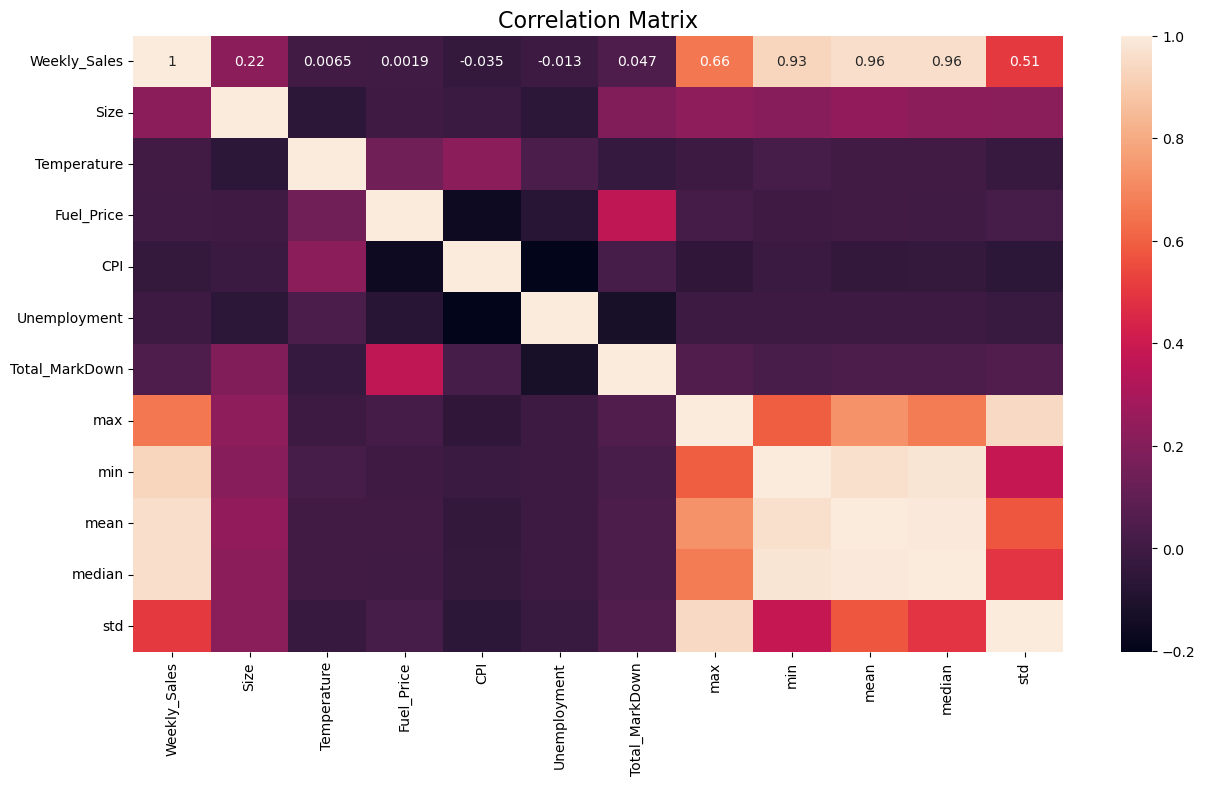

In [64]:
plt.figure(figsize=(15,8))
corr = data[num_col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

# Feature Engineering

## Applying Recursive Feature Elimination (RFE)

In [65]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Dept_1', 'Dept_10', 'Dept_11', 'Dept_12', 'Dept_13', 'Dept_14',
       'Dept_16', 'Dept_17', 'Dept_18',
       ...
       'Type_B', 'Type_C', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object', length=144)

## Feature Selection

In [68]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=23, oob_score=True)

In [69]:
import os
import pickle

# Define the file path
pkl_filename = "./models/feature_elim_regressor.pkl"

# Check if the directory exists, if not, create it
if not os.path.exists(os.path.dirname(pkl_filename)):
    os.makedirs(os.path.dirname(pkl_filename))

# Save the trained model to disk
with open(pkl_filename, 'wb') as file:
    pickle.dump(radm_clf, file)
    print("Saved model to disk")

Saved model to disk


In [70]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank

,rank,feature,importance
0,1,median,4.664304e-01
1,2,mean,4.616873e-01
2,3,Week,1.965527e-02
3,4,Temperature,8.698437e-03
4,5,max,6.033660e-03
...,...,...,...
139,140,Dept_51,2.813136e-10
140,141,Dept_45,1.901655e-10
141,142,Dept_78,3.259707e-12
142,143,Dept_39,3.327699e-14


In [71]:
x=feature_rank.loc[0:22,['feature']]
x=x['feature'].tolist()
print(x)

['median', 'mean', 'Week', 'Temperature', 'max', 'CPI', 'Fuel_Price', 'min', 'Unemployment', 'std', 'Month', 'Total_MarkDown', 'Dept_16', 'Dept_18', 'IsHoliday', 'Dept_3', 'Size', 'Year', 'Dept_9', 'Dept_11', 'Dept_1', 'Dept_5', 'Dept_7']


In [72]:
X = data[x]
Y = data['Weekly_Sales']

In [73]:
data = pd.concat([X,Y],axis=1)

In [74]:
data

,median,mean,Week,Temperature,max,CPI,Fuel_Price,min,Unemployment,std,...,IsHoliday,Dept_3,Size,Year,Dept_9,Dept_11,Dept_1,Dept_5,Dept_7,Weekly_Sales
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,0.173215,0.208157,5,0.328495,0.088635,0.840500,0.050100,0.253530,0.508787,0.138276,...,0,False,0.630267,2010,False,False,True,False,False,0.342576
2010-02-05,0.004767,0.004499,5,0.278565,0.001180,0.875680,0.050100,0.064648,0.305248,0.004083,...,0,False,0.492338,2010,False,False,False,False,False,0.009188
2010-02-05,0.008968,0.009135,5,0.278565,0.003866,0.875680,0.050100,0.066212,0.305248,0.004314,...,0,False,0.492338,2010,False,False,False,False,False,0.009537
2010-02-05,0.086290,0.085594,5,0.233627,0.018453,0.873861,0.050100,0.161046,0.291286,0.010611,...,0,False,0.650636,2010,False,False,False,False,False,0.118953
2010-02-05,0.071542,0.080242,5,0.278565,0.044887,0.875680,0.050100,0.126993,0.305248,0.054362,...,0,False,0.492338,2010,False,False,False,False,False,0.152888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,0.082590,0.087055,43,0.647585,0.030286,0.958935,0.518036,0.119050,0.275758,0.039642,...,0,False,0.906277,2012,False,False,False,False,False,0.127259
2012-10-26,0.001617,0.001419,43,0.602996,0.000446,0.050698,0.916333,0.064822,0.760713,0.000478,...,0,False,0.026063,2012,False,False,False,False,False,0.000730
2012-10-26,0.064375,0.072181,43,0.522178,0.063107,0.165055,0.801102,0.097548,0.496028,0.072670,...,0,False,0.916437,2012,False,False,False,False,False,0.073391


In [75]:
data.to_csv('./datasets/final_data.csv')

# Model Selection and Training

## Data Splitted into Training, Validation, Test

In [76]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)

## Feature Normalization

In [78]:
from sklearn.preprocessing import StandardScaler

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [79]:
from sklearn.linear_model import LinearRegression

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [80]:
from sklearn.metrics import r2_score

# Calculate R-squared score
lr_acc = r2_score(y_test, lr.predict(X_test_scaled)) * 100
print("Linear Regression Accuracy - ", lr_acc)

Linear Regression Accuracy -  92.27828803090458


In [81]:
y_pred = lr.predict(X_test_scaled)

In [82]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.030056426266716913
MSE 0.0034862759576421
RMSE 0.0590446945765841
R2 0.9227828958914516


In [83]:
import os

# Define the directory path
directory = "./predictions"

# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Create a DataFrame for actual and predicted values
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.to_csv('./predictions/lr_real_pred.csv')
lr_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.132668
2010-07-09,0.364278,0.279822
2011-07-01,0.005003,0.026248
2012-01-06,0.015856,0.015397
2011-08-26,0.000318,0.002140
...,...,...
2011-01-28,0.169068,0.236252
2010-08-20,0.252860,0.235734
2010-11-26,0.265617,0.321761


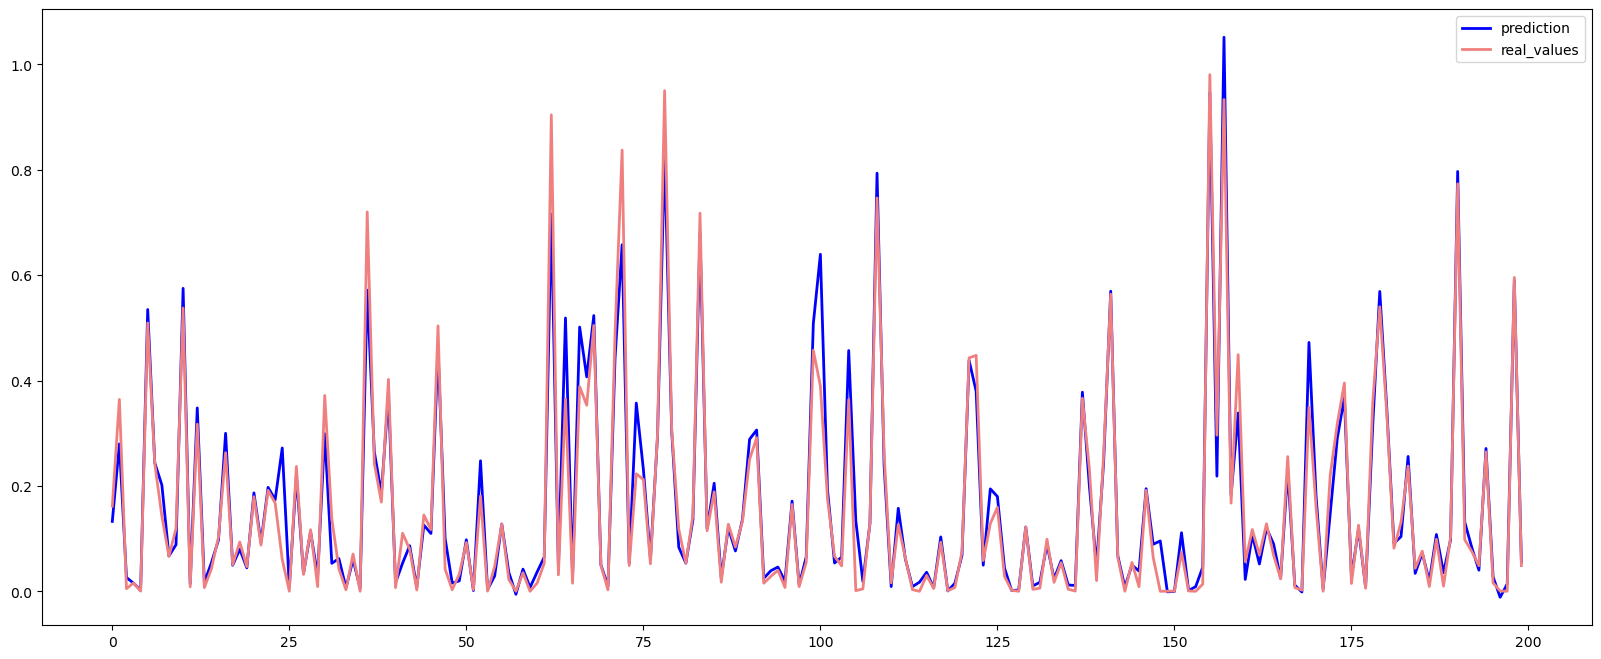

In [84]:
plt.figure(figsize=(20,8))
plt.plot(lr.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

Saving trained model

In [96]:
pkl_filename = "./models/linear_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lr, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


## Random Forest Regression

In [97]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [98]:
rf_acc = rf.score(X_test_scaled,y_test)*100
print("Random Forest Regressor Accuracy - ",rf_acc)

Random Forest Regressor Accuracy -  97.91317472830829


In [99]:
y_pred = rf.predict(X_test_scaled)

In [100]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.01547161782679715
MSE 0.0009421808015653032
RMSE 0.030694963781788424
R2 0.9791321095819095


In [101]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.to_csv('./predictions/rf_real_pred.csv')
rf_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.123496
2010-07-09,0.364278,0.327934
2011-07-01,0.005003,0.012851
2012-01-06,0.015856,0.019839
2011-08-26,0.000318,0.000516
...,...,...
2011-01-28,0.169068,0.174697
2010-08-20,0.252860,0.267647
2010-11-26,0.265617,0.377247


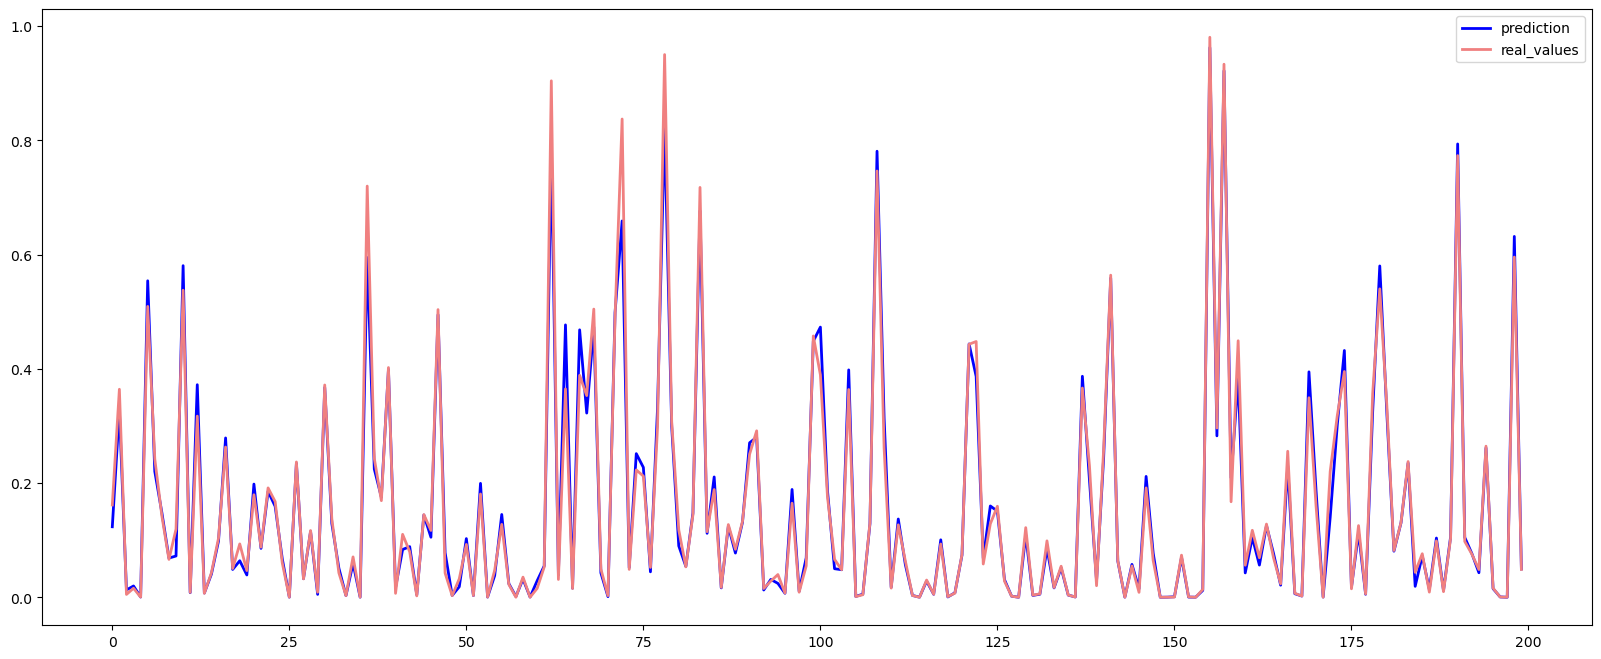

In [102]:
plt.figure(figsize=(20,8))
plt.plot(rf.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

Saving trained model

In [103]:
pkl_filename = "./models/randomforest_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(rf, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


## KNN Regression

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # Example values for n_neighbors
    'weights': ['uniform', 'distance']  # Example values for weights
}

# Create the KNN regressor
knn = KNeighborsRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

Best Parameters: {'n_neighbors': 5, 'weights': 'distance'}


In [108]:
# Evaluate the best model on the test set
mae = metrics.mean_absolute_error(y_test, best_knn.predict(X_test_scaled))
print("Mean Absolute Error on Test Set:", mae)

# Calculate KNeigbhbors Regressor Accuracy
knn_acc = best_knn.score(X_test_scaled, y_test) * 100
print("KNeigbhbors Regressor Accuracy - ", knn_acc)

Mean Absolute Error on Test Set: 0.02163306046756553
KNeigbhbors Regressor Accuracy -  96.26724391234322


In [109]:
# Make predictions
y_pred = best_knn.predict(X_test_scaled)

In [110]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.02163306046756553
MSE: 0.0016853021527121887
RMSE: 0.04105243175150759
R2: 0.9627080014976638


In [111]:
# Create a DataFrame for actual and predicted values
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.to_csv('./predictions/knn_real_pred.csv')
knn_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.140544
2010-07-09,0.364278,0.305045
2011-07-01,0.005003,0.014796
2012-01-06,0.015856,0.018373
2011-08-26,0.000318,0.000566
...,...,...
2011-01-28,0.169068,0.178710
2010-08-20,0.252860,0.265245
2010-11-26,0.265617,0.189878


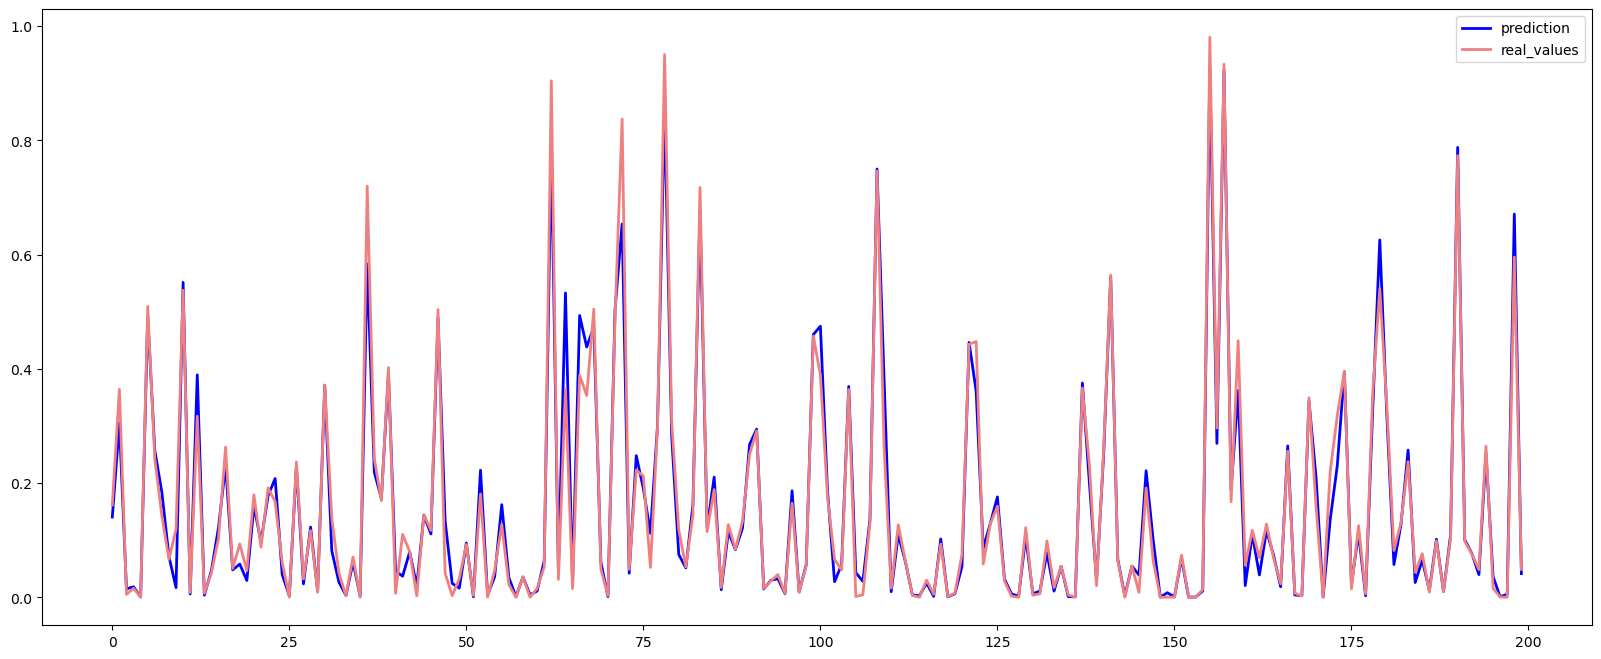

In [112]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20, 8))
plt.plot(best_knn.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.show()

Saving trained model

In [113]:
pkl_filename = "./models/knn_regressor.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
else:
  print("Model already saved")

Saved model to disk


## XGboost Regression

In [114]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Example values for n_estimators
    'max_depth': [3, 5, 7],  # Example values for max_depth
    'learning_rate': [0.01, 0.1, 0.2]  # Example values for learning_rate
}

# Create the XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_xgb_reg = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 150}


In [115]:
# Evaluate the best model on the test set
mae = metrics.mean_absolute_error(y_test, best_xgb_reg.predict(X_test_scaled))
print("Mean Absolute Error on Test Set:", mae)

# Calculate XGBoost Regressor Accuracy
xgb_acc = best_xgb_reg.score(X_test_scaled, y_test) * 100
print("XGBoost Regressor Accuracy - ", xgb_acc)

Mean Absolute Error on Test Set: 0.01854961810859391
XGBoost Regressor Accuracy -  97.63894312208085


In [116]:
# Make predictions
y_pred = best_xgb_reg.predict(X_test_scaled)

In [117]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.01854961810859391
MSE: 0.0010659936372994943
RMSE: 0.03264955799546901
R2: 0.9763899017272601


In [118]:
# Create a DataFrame for actual and predicted values
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.to_csv('./predictions/xgb_real_pred.csv')
xgb_df

,Actual,Predicted
Date,,
2011-08-05,0.161661,0.122945
2010-07-09,0.364278,0.312529
2011-07-01,0.005003,0.019668
2012-01-06,0.015856,0.020491
2011-08-26,0.000318,0.002053
...,...,...
2011-01-28,0.169068,0.209064
2010-08-20,0.252860,0.244997
2010-11-26,0.265617,0.447810


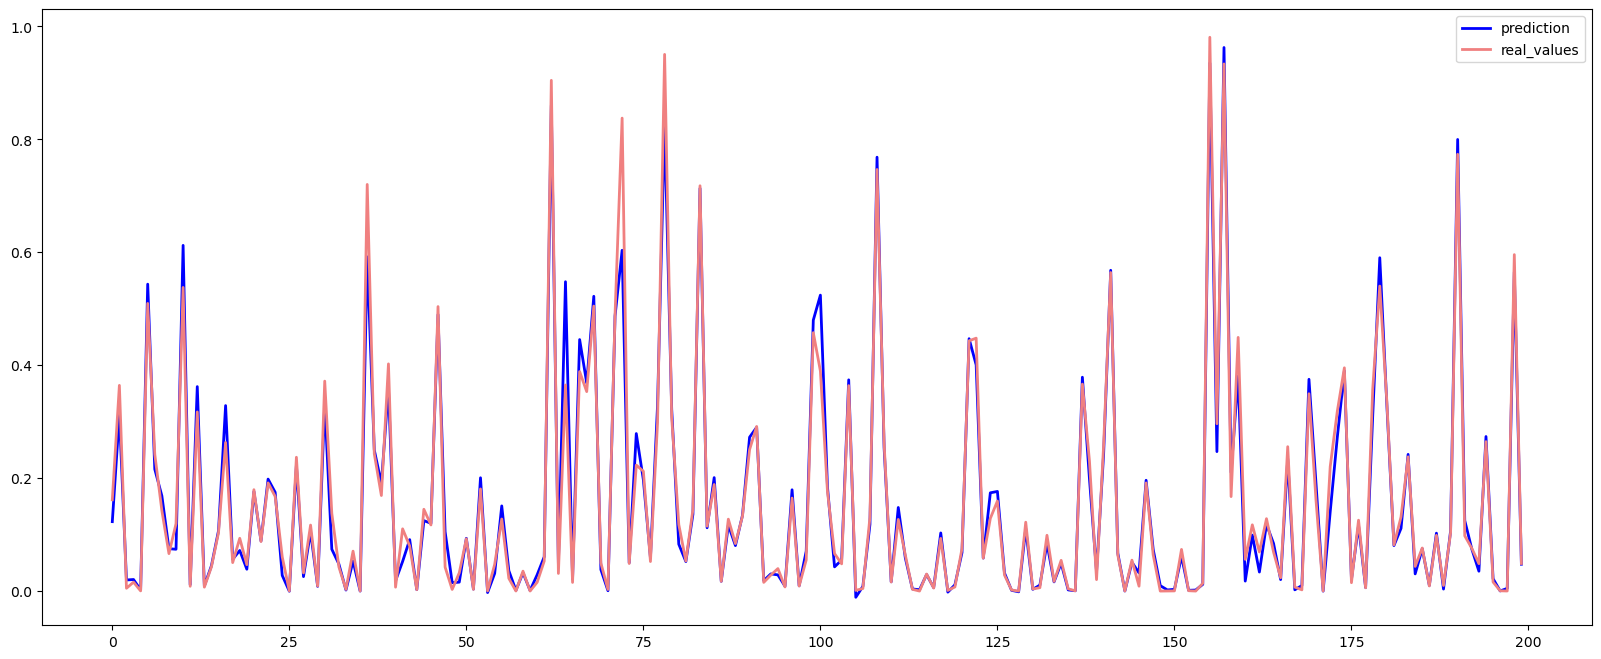

In [119]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20, 8))
plt.plot(best_xgb_reg.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0, color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0, color='lightcoral')
plt.legend(loc="best")
plt.show()

Saving trained model

In [121]:
pkl_filename = "./models/xgboost_regressor.pkl"
if not path.isfile(pkl_filename):
    # Saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
        pickle.dump(best_xgb_reg, file)  
    print("Saved model to disk")
else:
    print("Model already saved")

Model already saved


## Deep Learning Neural Network

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
pip install --upgrade tensorflow

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the custom deep learning neural network
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))  # Added activation function
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_absolute_error', optimizer='adam')
    return model

# Create the model
model = create_model()

# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=5000)


C:\Users\MIMMIM\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.1347 - val_loss: 0.0429
Epoch 2/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0368 - val_loss: 0.0306
Epoch 3/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0298 - val_loss: 0.0288
Epoch 4/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0284 - val_loss: 0.0279
Epoch 5/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0276 - val_loss: 0.0272
Epoch 6/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0267 - val_loss: 0.0267
Epoch 7/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0265 - val_loss: 0.0265
Epoch 8/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0264 - val_loss: 0.0264
Epoch 9/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - val_loss: 0.0261
Epoch 10/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0258 - val_loss: 0.0260
Epoch 11/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0256 - val_loss: 0.0258
Epoch 12/100
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

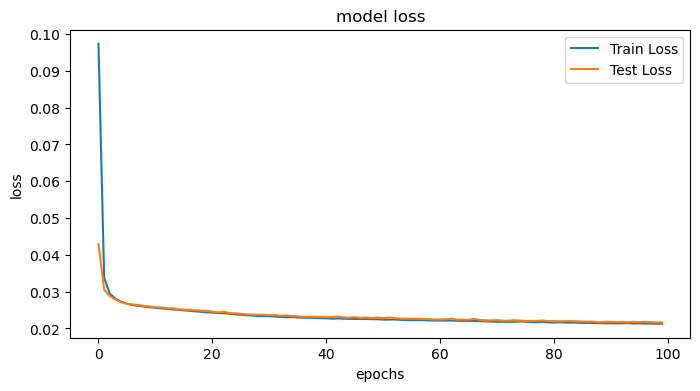

In [86]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

In [109]:
dnn_acc = metrics.r2_score(y_pred, y_test)*100
print("Deep Neural Network Accuracy - ",dnn_acc)

Deep Neural Network Accuracy -  95.84402068213723


In [110]:
# Evaluate the model
y_pred = model.predict(X_test_scaled)

2340/2340 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [111]:
# Calculate evaluation metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.explained_variance_score(y_test, y_pred)

# Print evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.02176946198856329
MSE: 0.0018052811523843798
RMSE: 0.04248860026388702
R2: 0.9601617263685474


In [114]:
import pandas as pd

# Reshape y_test and y_pred arrays to be 1-dimensional
y_test_1d = y_test.ravel()
y_pred_1d = y_pred.ravel()

# Create DataFrame for actual and predicted values
dnn_df = pd.DataFrame({'Actual': y_test_1d, 'Predicted': y_pred_1d})
dnn_df.to_csv('./predictions/dnn_real_pred.csv')
dnn_df

,Actual,Predicted
0,0.161661,0.115933
1,0.364278,0.312023
2,0.005003,0.014362
3,0.015856,0.020407
4,0.000318,0.001644
...,...,...
74845,0.169068,0.225616
74846,0.252860,0.249082
74847,0.265617,0.235363
74848,0.008865,0.011011


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


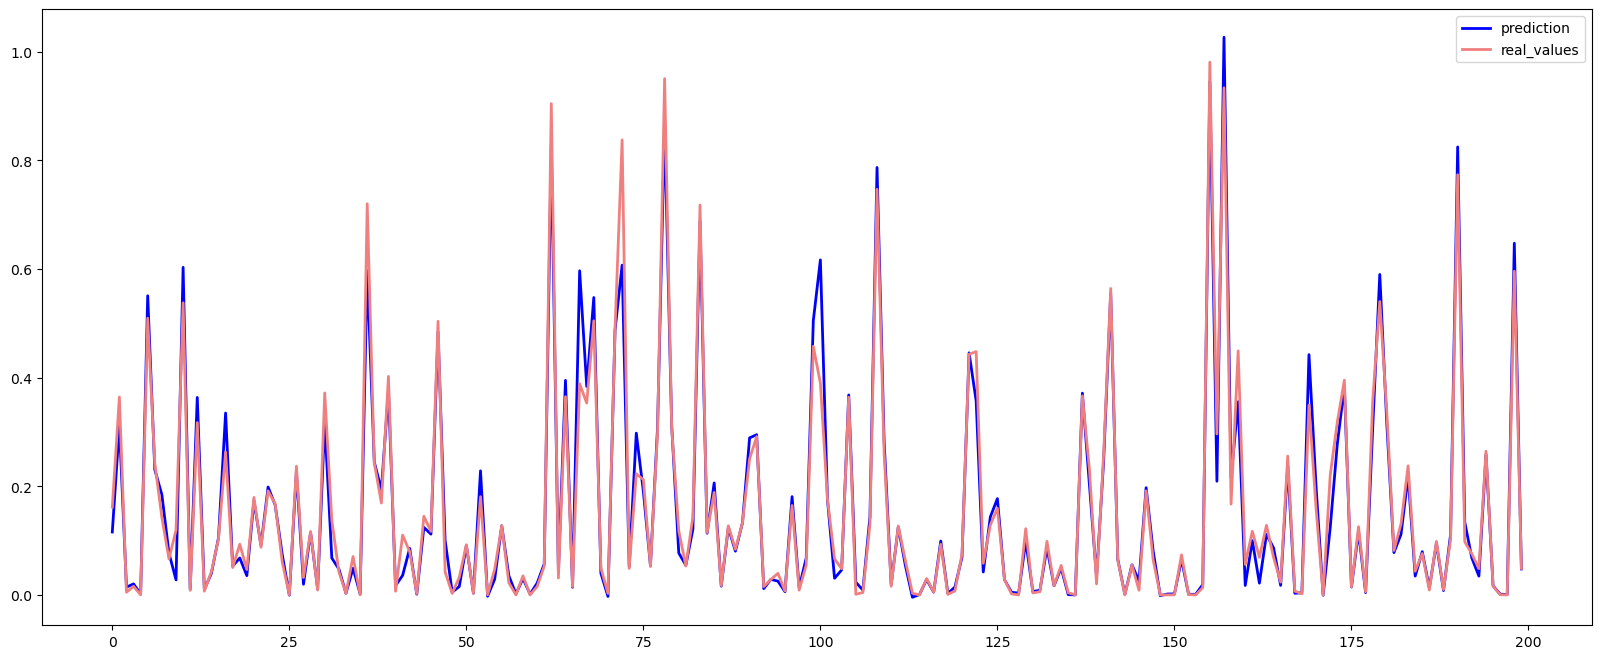

In [115]:
# Plot actual vs. predicted values for the first 200 samples
plt.figure(figsize=(20,8))
plt.plot(model.predict(X_test_scaled[:200]), label="prediction", linewidth=2.0,color='blue')
plt.plot(y_test[:200].values, label="real_values", linewidth=2.0,color='lightcoral')
plt.legend(loc="best")
plt.show()

Saving trained model

In [116]:
filepath = './models/dnn_regressor.json'
weightspath = './models/dnn_regressor.h5'
if not path.isfile(filepath):
    # Serialize model to JSON
    model_json = model.to_json()
    with open(filepath, "w") as json_file:
        json_file.write(model_json)
    print("Saved model to disk")
else:
    print("Model already saved")

Model already saved


# Model Comparison

In [120]:
# Model accuracy data
lr_acc = 92.27828803090458
rf_acc = 97.91317472830829
knn_acc = 96.26724391234322
xgb_acc = 97.63894312208085
dnn_acc = 95.84402068213723

In [121]:
# Create a dictionary with model names and their accuracies
acc = {'model': ['Linear Regression', 'Random Forest', 'KNN', 'XGBoost', 'DNN'],
       'accuracy': [lr_acc, rf_acc, knn_acc, xgb_acc, dnn_acc]}

In [122]:
# Convert the dictionary to a DataFrame
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,Linear Regression,92.278288
1,Random Forest,97.913175
2,KNN,96.267244
3,XGBoost,97.638943
4,DNN,95.844021


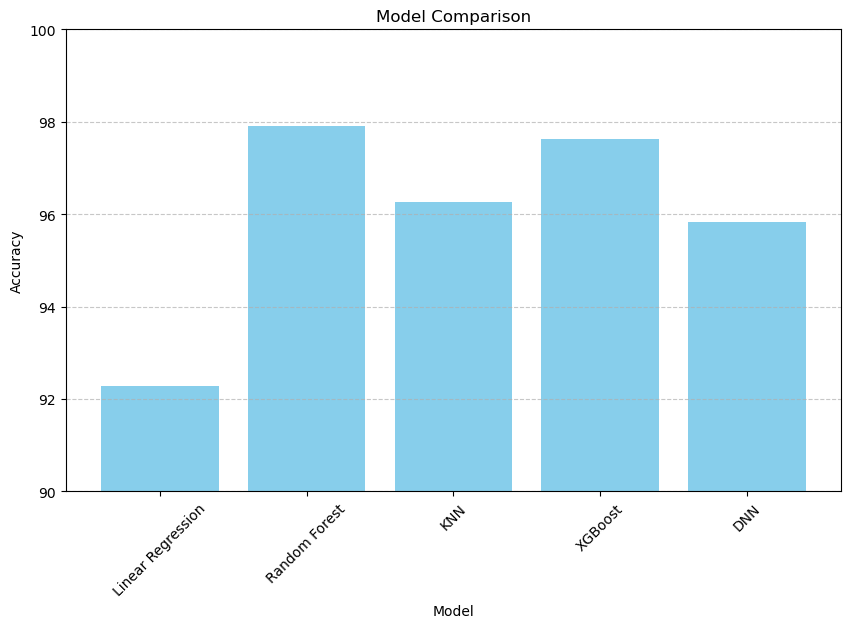

In [123]:
# Plot the model accuracies
plt.figure(figsize=(10, 6))
plt.bar(acc_df['model'], acc_df['accuracy'], color='skyblue')
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(90, 100)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In this model comparison, Random Forest and XGBoost demonstrate the highest accuracies, surpassing 97%. While KNN and the Deep Neural Network (DNN) also perform well, achieving approximately 96% accuracy, Linear Regression lags behind slightly at around 92%. Overall, Random Forest and XGBoost emerge as the top-performing models based on their higher accuracy scores.